In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import the dataset:

In [2]:
data_frame = pd.read_csv('winequality-red.csv')

In [3]:
print(data_frame.shape)
data_frame.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
A =np.array(data_frame.quality.unique())
A

array([5, 6, 7, 4, 8, 3], dtype=int64)

## 2. Data quality check:
a. Check if null values are present. If there are, drop those rows.

In [5]:
data_frame.isnull().sum()

## Since there are no null values present so we are not dropping any.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# data_frame.info()

## 3. Exploratory Data Analysis:
### a. Univariate Analysis:

- i. Draw a minimum of 5 histograms .

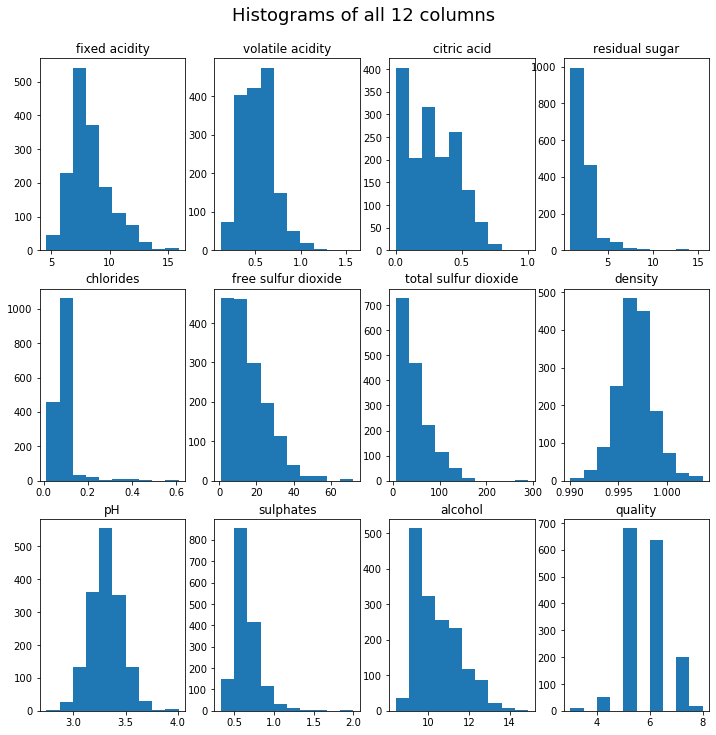

In [7]:
# Histograms all at one go.
%matplotlib inline
list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
fig, ax = plt.subplots(3,4, figsize=(12,12))#,squeeze=False)
i=0
for row in range(3):
    for col in range(4):
        ax[row][col].hist(data_frame.iloc[:,i])
        ax[row][col].set_title(list1[i])
        i+=1
fig.suptitle('Histograms of all 12 columns',y=0.94,size=18)
plt.show()

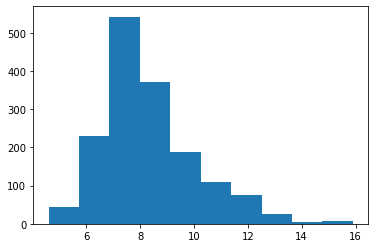

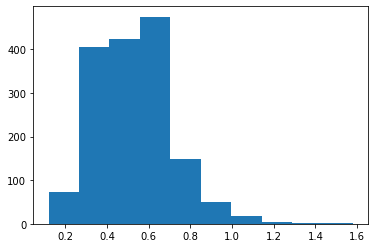

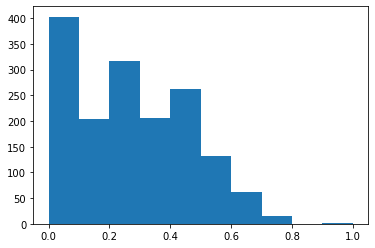

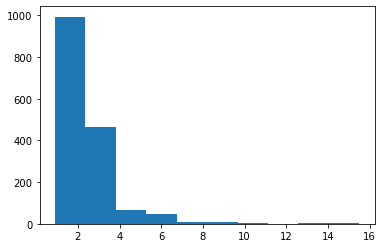

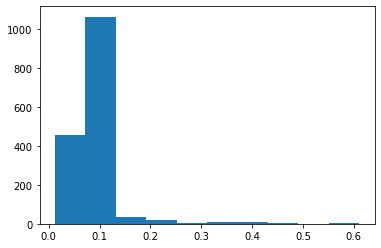

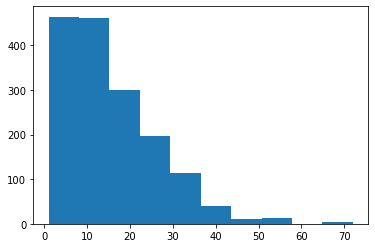

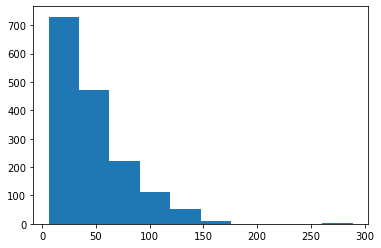

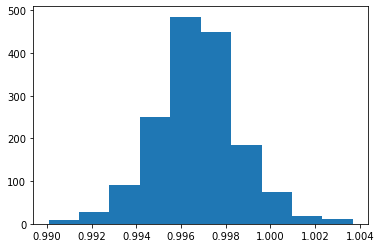

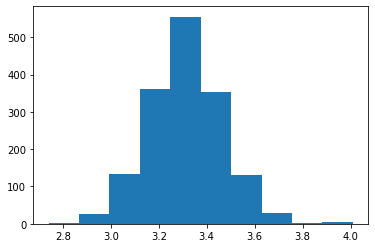

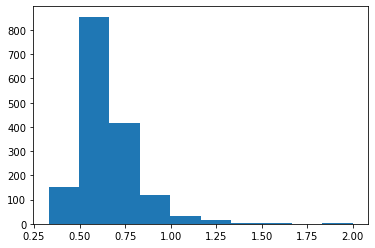

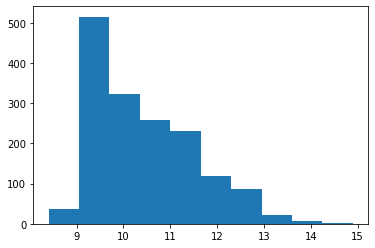

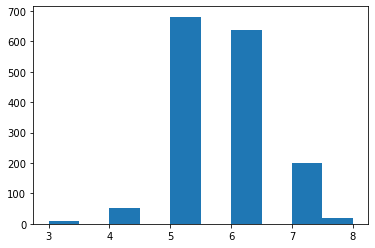

In [8]:
# Histograms one by one.
%matplotlib inline
list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for i in list1:
    plt.figure()
    plt.hist(data_frame[i])
plt.show()

- ii. Draw boxplots for each numerical columns.

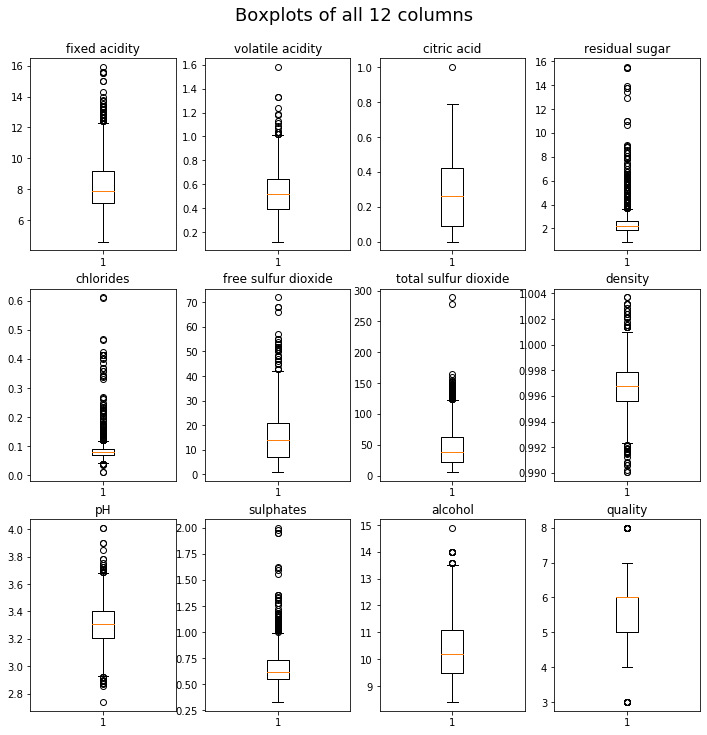

In [9]:
# Boxplot using matplotlib all together
%matplotlib inline
list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
fig, ax = plt.subplots(3,4, figsize=(12,12))#,squeeze=False)
i=0
for row in range(3):
    for col in range(4):
        ax[row][col].boxplot(data_frame.iloc[:,i])
        ax[row][col].set_title(list1[i])
        i+=1
fig.suptitle('Boxplots of all 12 columns',y=0.94,size=18)
plt.show()

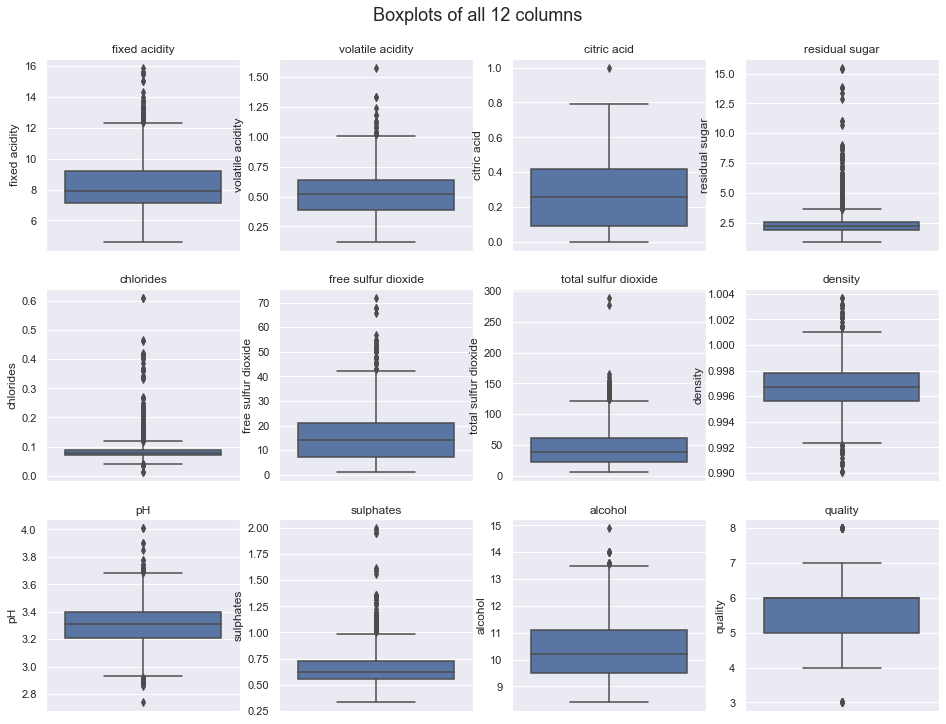

In [10]:
# Boxplot using seaborn all together
%matplotlib inline
sns.set()
list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
fig, ax = plt.subplots(3,4, figsize=(16,12))#,squeeze=False)
i=0
for row in range(3):
    for col in range(4):
        sns.boxplot(y=data_frame.iloc[:,i], ax=ax[row][col])
        ax[row][col].set_title(list1[i])
        i+=1
fig.suptitle('Boxplots of all 12 columns',y=0.94,size=18)
plt.show()

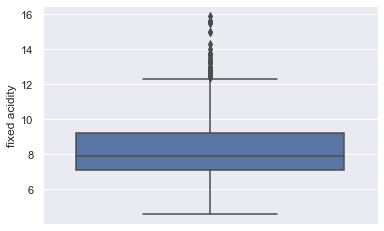

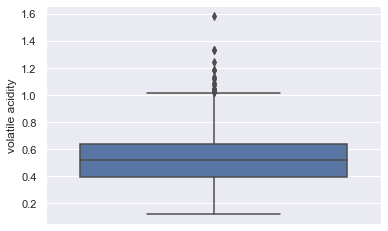

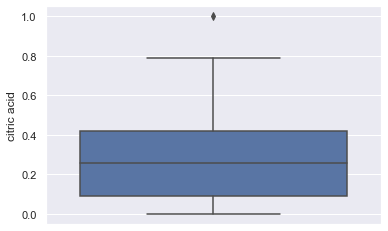

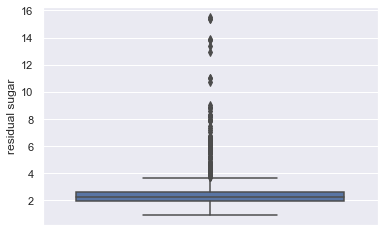

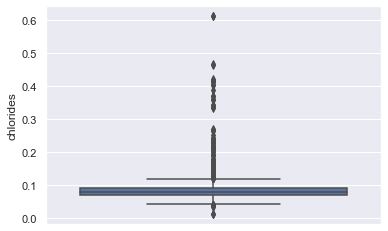

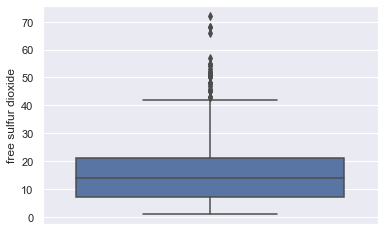

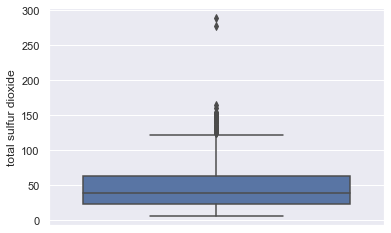

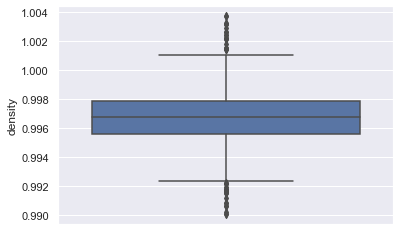

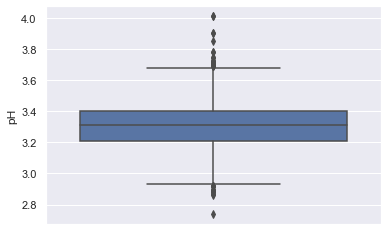

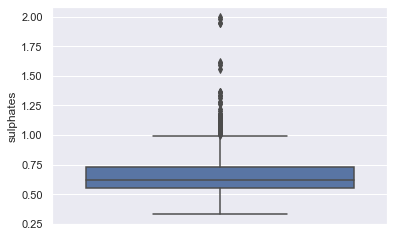

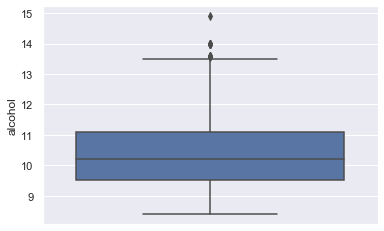

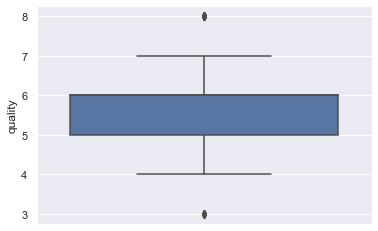

In [11]:
# Boxplot using seaborn one-by-one
%matplotlib inline
# list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for i in list1:
    plt.figure()
    sns.boxplot(y=data_frame[i])
plt.show()

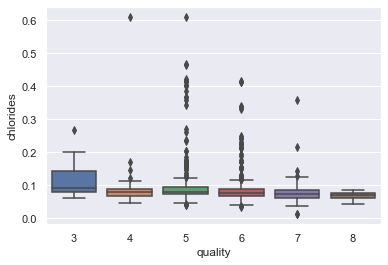

In [12]:
sns.boxplot(x=data_frame['quality'], y=data_frame['chlorides'])

### b. Bivariate analysis:

- i. Draw a minimum of 5 scatter plots

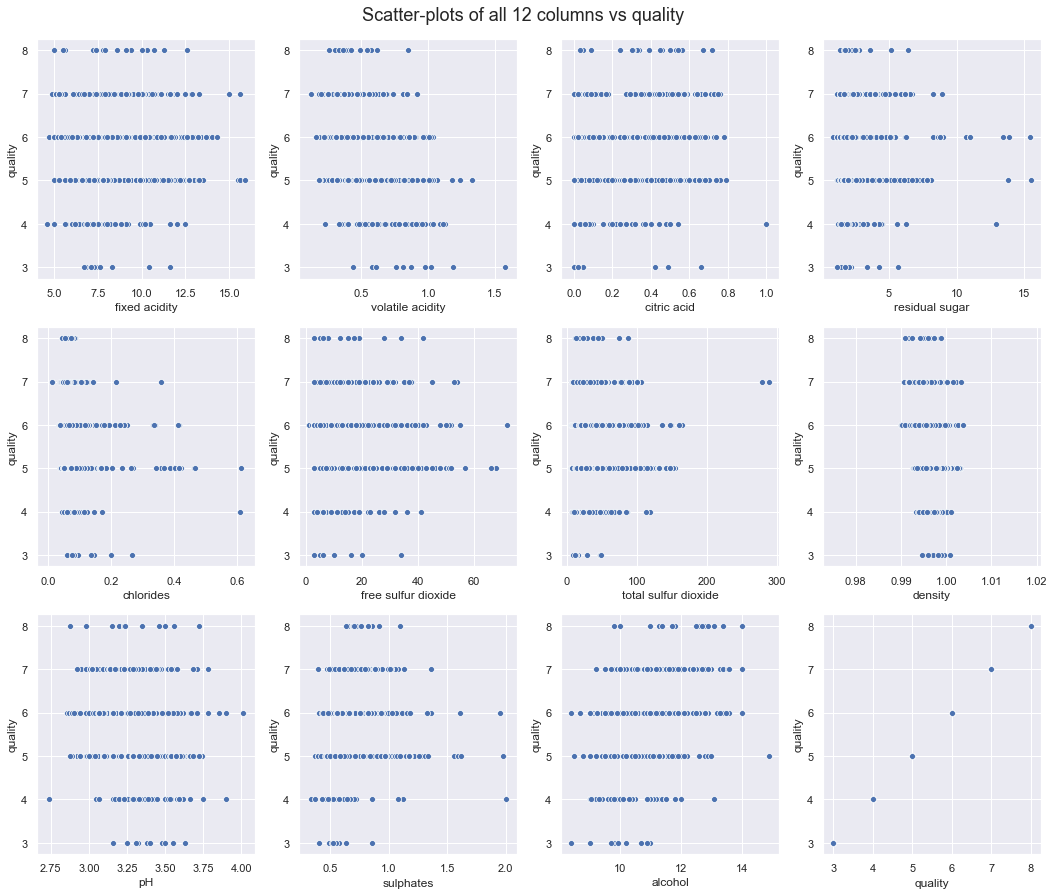

In [13]:
# Scatter-plot using seaborn all together.
%matplotlib inline
list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
fig, ax = plt.subplots(3,4, figsize=(18,15))#,squeeze=False)
i=0
for row in range(3):
    for col in range(4):
        sns.scatterplot(x=data_frame.iloc[:,i],y=data_frame.iloc[:,11], ax=ax[row][col])
#         ax[row][col].set_title(list1[11]+' vs '+list1[i])
        i+=1
fig.suptitle('Scatter-plots of all 12 columns vs quality',y=0.91,size=18)
plt.show()

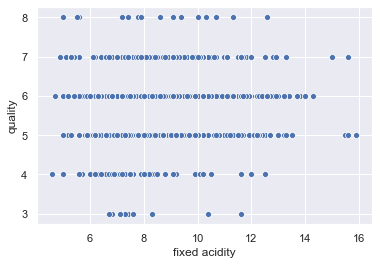

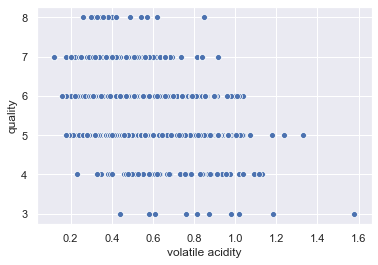

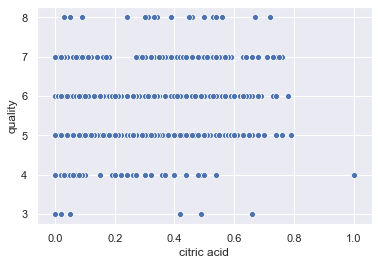

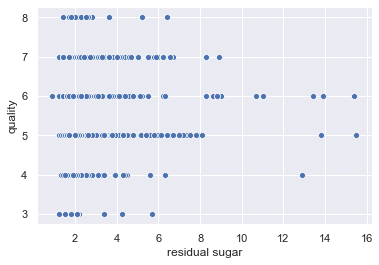

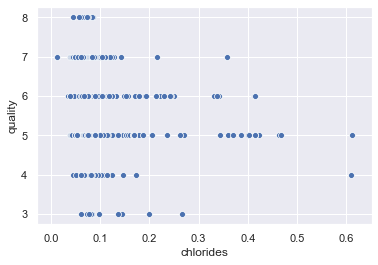

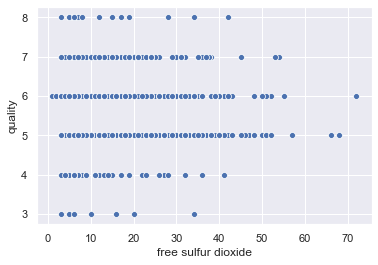

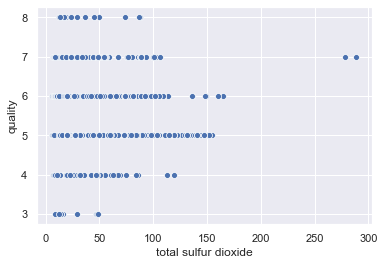

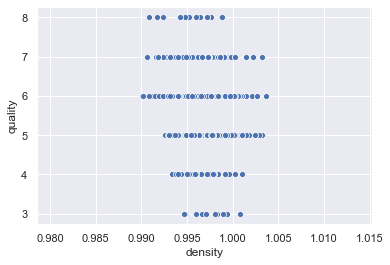

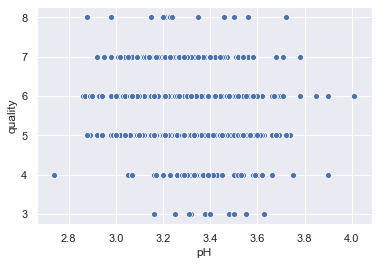

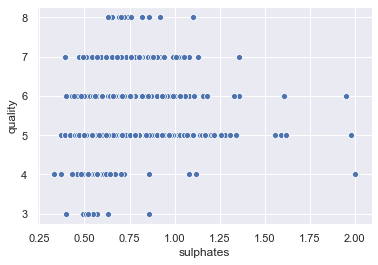

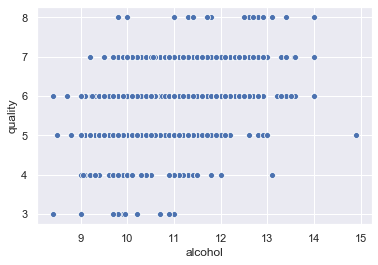

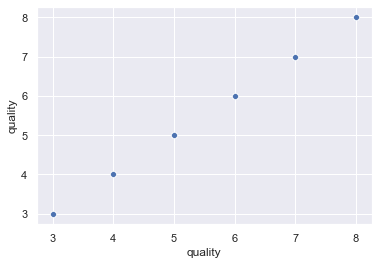

In [14]:
# Scatterplot using seaborn one-by-one
%matplotlib inline
list1 = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for i in list1:
    plt.figure()
    sns.scatterplot(x=data_frame[i], y=data_frame.iloc[:,11])
plt.show()

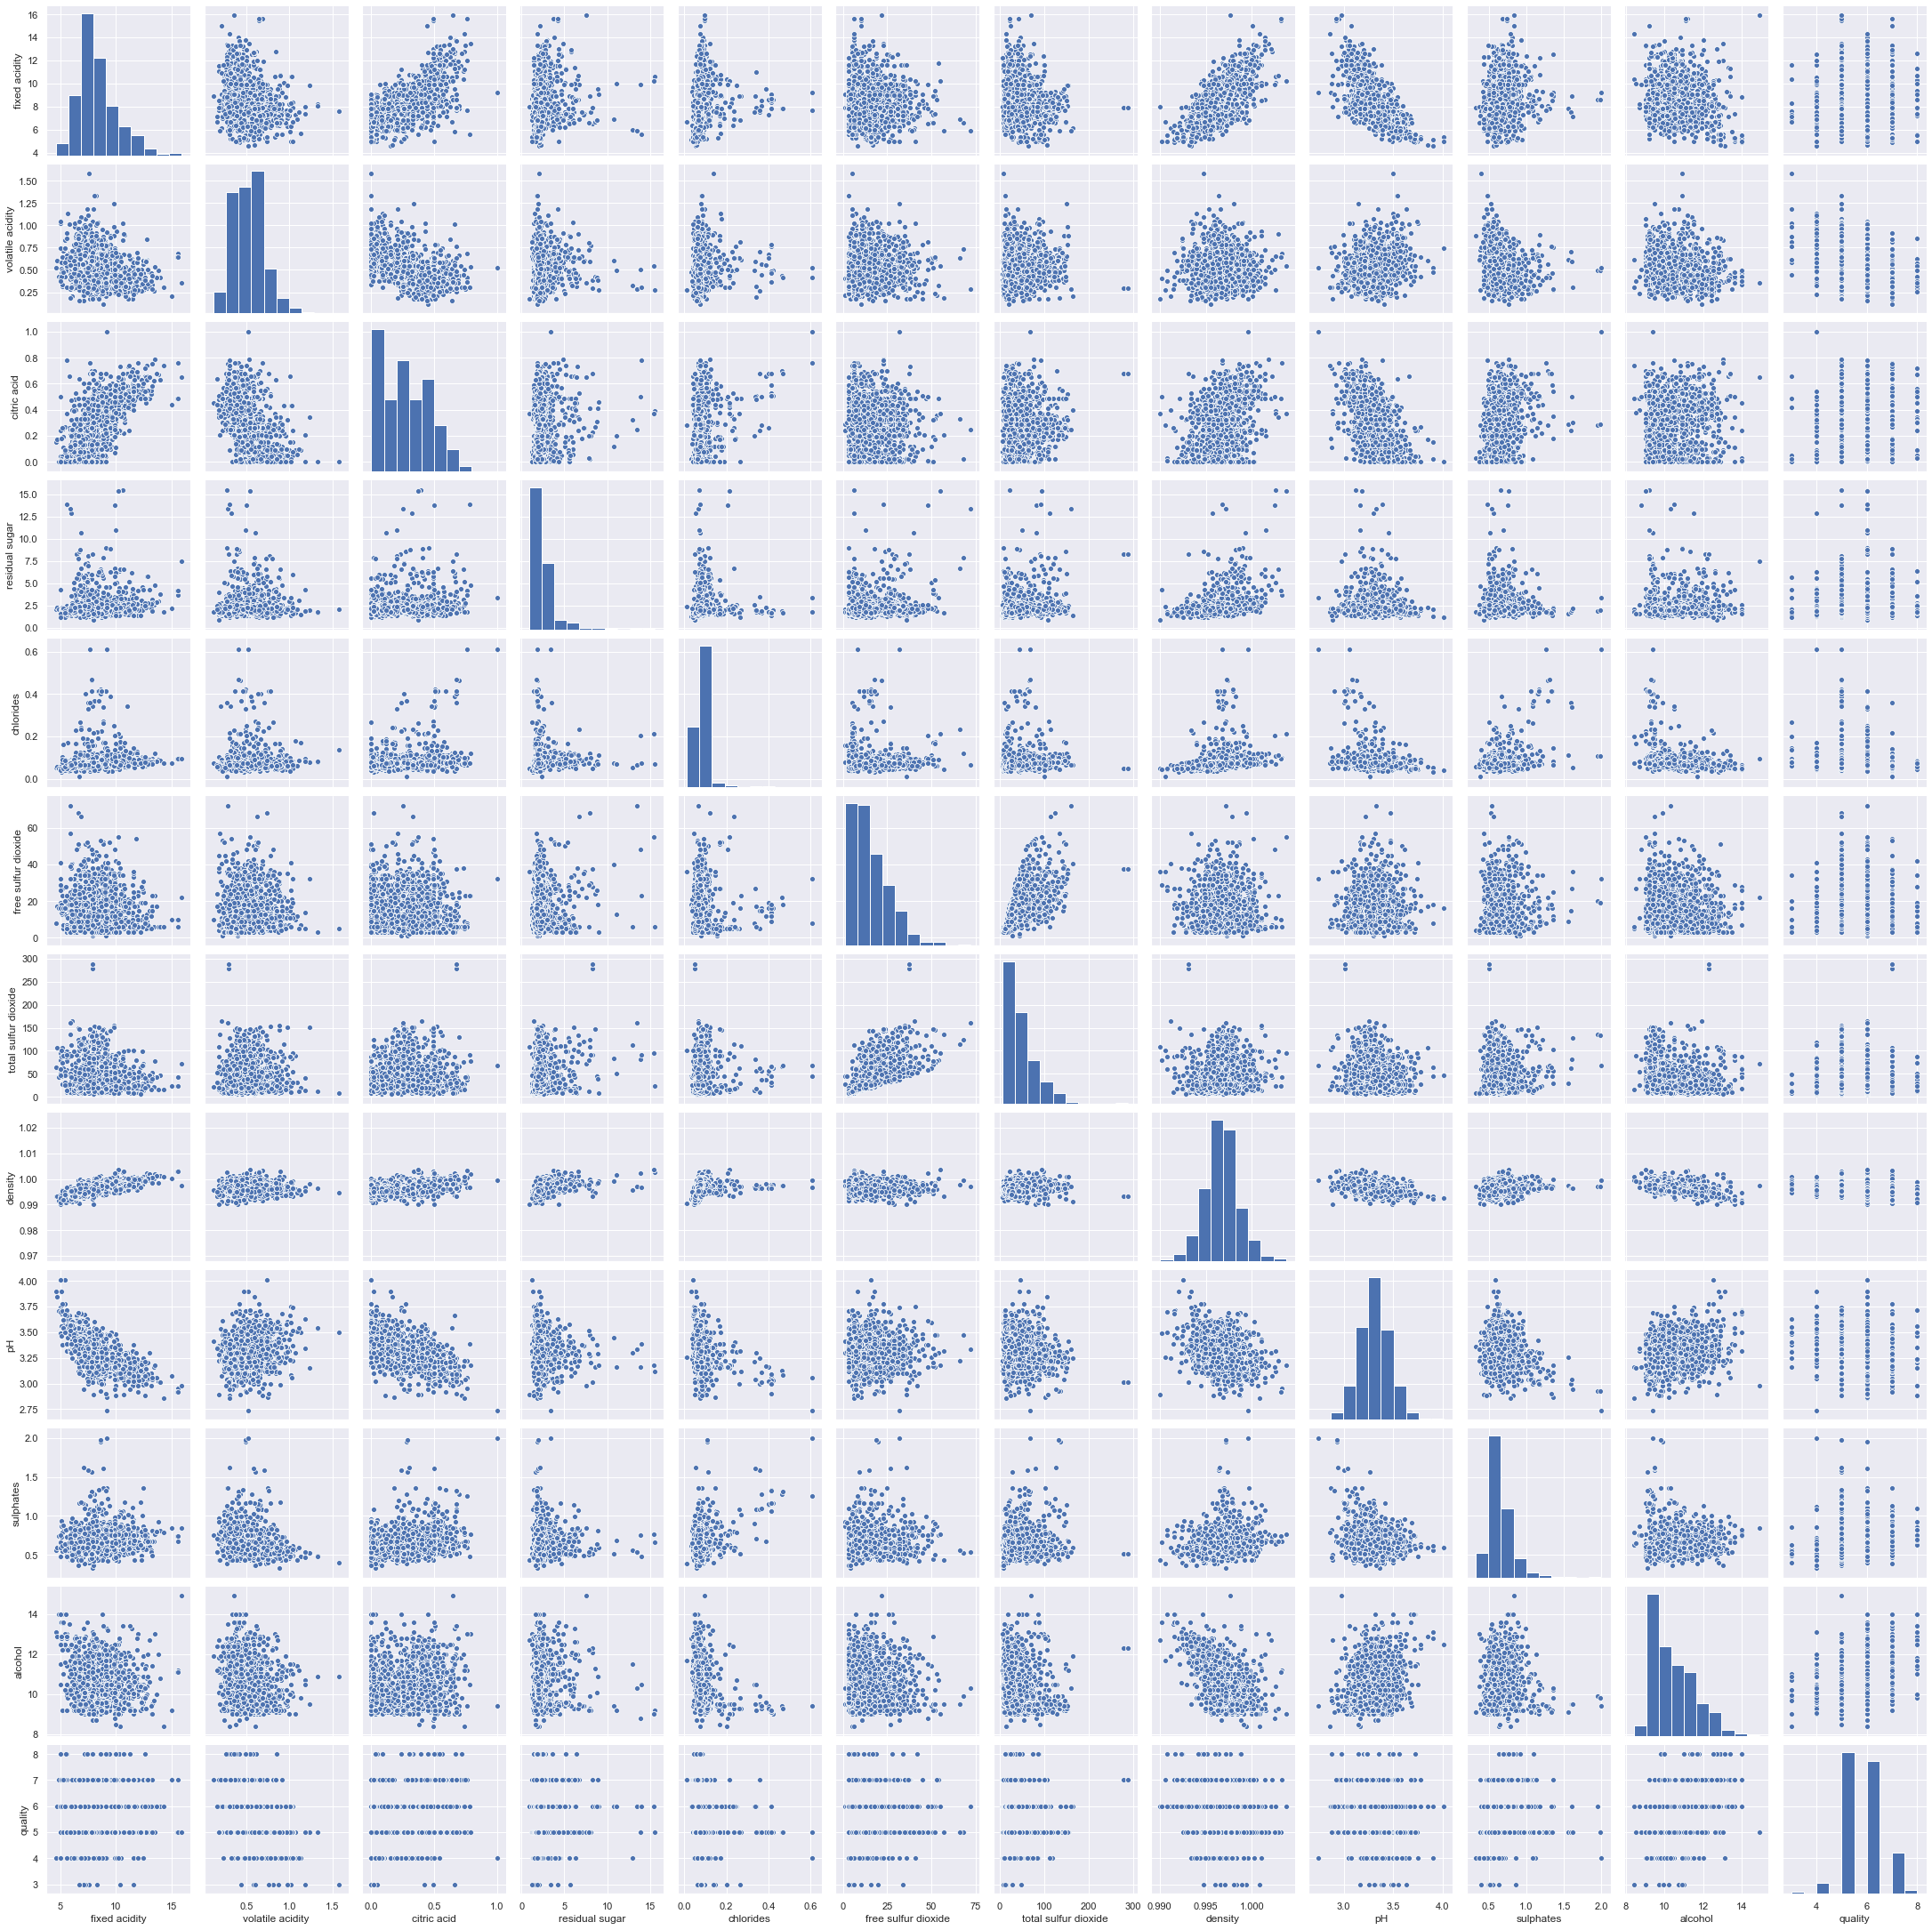

In [15]:
# Pair-plot of seaborn
sns.pairplot(data_frame)

### Outliers

In [16]:
# As we can see there are a lot of outliers present in this.
# calculate summary statistics
data_mean = np.empty(shape=(12))
data_std = np.empty(shape=(12))
for i in range(12):
    data_mean[i] = np.mean(data_frame.iloc[:,i])
    data_std[i] = np.std(data_frame.iloc[:,i])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [17]:
data_outliers = np.empty(shape=(11,1599), dtype=np.bool)
for i in range(11):
    pos = 0
    for x in data_frame.iloc[:,i]:
        if x>=lower[i] and x<=upper[i]:
            data_outliers[i][pos] = True
        else:
            data_outliers[i][pos] = False
        pos += 1
# Shape must be ((n_row-1),n_col)
print(data_outliers.shape)

# How many outliers are there for each column
print('The outliers for each colums -',1599 - data_outliers.sum(axis=1))

# Taking sum row-wise. The row having least sum must have the maximum outliers.
print(data_outliers.sum(axis=0))
# Dropping rows that have 
useful_rows = data_outliers.sum(axis=0) > 9
print(useful_rows.sum())
df_new = data_frame.iloc[useful_rows,:]
df_new.shape

(11, 1599)
The outliers for each colums - [12 10  1 30 31 22 15 18  8 27  8]
[11 11 11 ... 11 11 11]
1566


(1566, 12)

### Checking Correlation using heatmap

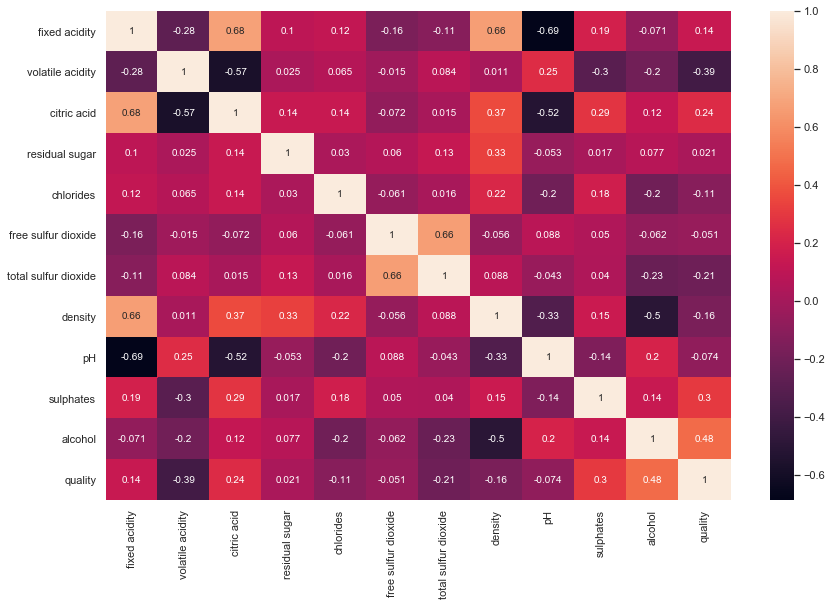

In [18]:
# Plotting it after removing outliers
plt.figure(figsize=[14,9])
sns.heatmap(df_new.corr(),annot=True)

The heatmap above shows the correlation between variables in the dataset. It shows how variables are dependent on each other and by what factor and also their nature of dependency (directly or inversely proportional). By seeing at the heatmap we can see that the top 6 features that affect the quality of wine are alcohol, sulphates, total sulfur dioxide, citric acid, fixed acidity, volatile acidity.

## 4. Modelling:
a. Split the dataset using “train-test-split” function. <br>
b. Apply KNN classification on “quality” column of the dataset. Select the appropriate features <br>
c. Predict on the test set. <br>
d. Find out the accuracy.

In [19]:
# Dividind data into Independent-variable(X) and Dependent-variable(y)

# For X, using above 6 features.
# X = df_new[['fixed acidity','volatile acidity','citric acid','total sulfur dioxide','sulphates','alcohol']]
X = df_new.iloc[:,[0,1,2,6,9,10]]
y = df_new.iloc[:, -1]
print(data_frame.iloc[:,-1].value_counts())
y.value_counts()
# X.head()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


5    660
6    631
7    196
4     52
8     17
3     10
Name: quality, dtype: int64

In [20]:
# Labeling 3,4,5 as Bad or 0 and 6,7,8 as 'Good' or 1.

# y = df_new.iloc[:,-1].map({
#         3 : 'Bad',
#         4 : 'Bad',
#         5 : 'Bad',
#         6 : 'Good',
#         7 : 'Good',
#         8 : 'Good'         
# })
# y

In [21]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y= le.fit_transform(y)
y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=9)
# print(X.head())
# y.head()
print(X_train.shape, X_test.shape)
# pd.Series(y_test).value_counts()

(1174, 6) (392, 6)


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaler.fit(X_train)
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)
# print(data_frame.shape, X_Scaled.shape)
pd.DataFrame(X_train_Scaled).head()

,0,1,2,3,4,5
0,0.404255,0.273973,0.282051,0.080537,0.145455,0.267857
1,0.372340,0.311644,0.282051,0.395973,0.109091,0.142857
2,0.340426,0.356164,0.000000,0.328859,0.181818,0.464286
3,0.393617,0.366438,0.153846,0.718121,0.200000,0.250000
4,0.255319,0.342466,0.230769,0.295302,0.163636,0.160714


1  ->  0.6887755102040817
2  ->  0.6020408163265306
3  ->  0.5841836734693877
4  ->  0.6122448979591837
5  ->  0.6147959183673469
6  ->  0.6020408163265306
7  ->  0.5994897959183674
8  ->  0.5969387755102041
9  ->  0.5841836734693877
10  ->  0.5943877551020408
11  ->  0.5867346938775511
12  ->  0.5790816326530612
13  ->  0.5969387755102041
14  ->  0.5867346938775511
15  ->  0.5943877551020408
16  ->  0.6071428571428571
17  ->  0.6198979591836735
18  ->  0.6198979591836735
19  ->  0.6198979591836735


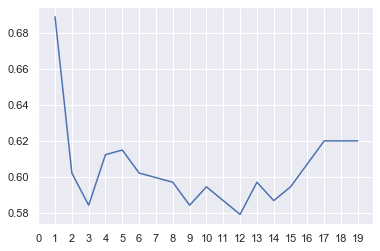

Max value is -> 0.6887755102040817 at n_neighbors = 1


In [24]:
from sklearn.neighbors import KNeighborsClassifier
new = [None]
sns.set()
for i in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=i)#, algorithm='brute')
    KNN.fit(X_train_Scaled, y_train)
    new.append(KNN.score(X_test_Scaled,y_test))
    print(i,' -> ',KNN.score(X_test_Scaled,y_test))
_=plt.plot(new)
plt.xticks(np.arange(0,20,1))
plt.show()
print('Max value is ->', max(new[1:]), 'at n_neighbors =', new.index(max(new[1:])))

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
knn = KNeighborsClassifier(n_neighbors = new.index(max(new[1:])))
knn.fit(X_train_Scaled, y_train)
pred_knn = knn.predict(X_test_Scaled)

#Let's see how our model performed
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.12      0.11      0.12         9
           2       0.77      0.74      0.76       176
           3       0.64      0.72      0.68       149
           4       0.65      0.58      0.61        53
           5       0.50      0.33      0.40         3

    accuracy                           0.69       392
   macro avg       0.45      0.41      0.43       392
weighted avg       0.69      0.69      0.69       392

[[  0   0   2   0   0   0]
 [  0   1   4   3   1   0]
 [  0   6 130  35   5   0]
 [  0   1  29 107  11   1]
 [  0   0   3  19  31   0]
 [  0   0   0   2   0   1]]


C:\Python 337\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print("The accuracy of this model is",accuracy_score(y_test,pred_knn)*100,"%")
# KNN.score(X_test_Scaled,y_test)

The accuracy of this model is 68.87755102040816 %
